In [2]:
import numpy as np
import tensorflow as tf

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append(r'D:\Users\Madhouse\tensorflow\yobiface\src')
import utils

import os
from os.path import join as pjoin
import sys
import copy

import models.nn4 as network

print(tf.__version__)

1.7.0


d:\Users\Madhouse\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
tf.reset_default_graph()
sess = tf.Session()
saver = tf.train.import_meta_graph(r'D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.meta')
saver.restore(sess, r'D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.ckpt-275')
images_placeholder = tf.get_default_graph().get_tensor_by_name("input:0")
embeddings = tf.get_default_graph().get_tensor_by_name("embeddings:0")
phase_train_placeholder = tf.get_default_graph().get_tensor_by_name("phase_train:0")

INFO:tensorflow:Restoring parameters from D:\Users\Madhouse\tensorflow\download\20180402-114759\model-20180402-114759.ckpt-275


In [42]:
def load_data(data_dir):
    data = {}
    pics_ctr = 0
    for guy in os.listdir(data_dir):
        person_dir = pjoin(data_dir, guy)
        curr_pics = [utils.preproc(cv2.imread(pjoin(person_dir, f))) for f in os.listdir(person_dir)]
        if len(curr_pics) < 2 or np.random.random() > 0.5:
            continue
        if pics_ctr > 100:
            break
        data[guy] = curr_pics
        pics_ctr += len(curr_pics)
    return data, pics_ctr

def load_all_data(data_dir):
    data = {}
    pics_ctr = 0
    for guy in os.listdir(data_dir):
        person_dir = pjoin(data_dir, guy)
        curr_pics = [utils.preproc(cv2.imread(pjoin(person_dir, f))) for f in os.listdir(person_dir)]
        if len(curr_pics) < 2:
            continue
        data[guy] = curr_pics
        pics_ctr += len(curr_pics)
    return data, pics_ctr

def load_one_data(pic_path):
    data = {}
    guy=pic_path.split("/")[-1][:-4]
    curr_pics = utils.preproc(cv2.imread(pic_path))
    data[guy] = curr_pics
    return data
                       
def load_all_pics(path):
    data = {}
    pics_ctr = 0
    files= os.listdir(path)
    for file in files: #遍历文件夹 
        if not os.path.isdir(file): #判断是否是文件夹，不是文件夹才打开
        #print(file)
            if(file.find(".jpg") > 0):
                guy=file.split("/")[-1][:-4]
                #print("guy[%d]=%s"%(pics_ctr,guy))
                curr_pics = [utils.preproc(cv2.imread(file))]
                data[guy] = curr_pics
                pics_ctr += len(curr_pics)
    return data, pics_ctr

In [36]:
DATA_DIR = "C:/Users/Madhouse/Ana_Palacio.jpg"
data1 = load_one_data(DATA_DIR)
print(len(data1))
#print(data1)

1


In [43]:
DATA_DIR = "C:/Users/Madhouse"
data2, n_pics2 = load_all_pics(DATA_DIR)
print('Loaded %d pics.' % n_pics2)
#print(data1['Ana_Palacio'])

Loaded 17 pics.


In [41]:
DATA_DIR = r'D:\Users\Madhouse\tensorflow\download\lfw'
data3, n_pics3 = load_all_data(DATA_DIR)

print('Loaded %d pics of %d people.' % (n_pics3,len(data3)))

Loaded 9164 pics.


Loaded 106 pics.
Random guy from LFW dataset


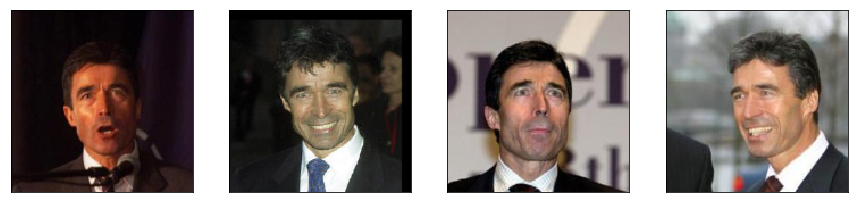

In [6]:
DATA_DIR = r'D:\Users\Madhouse\tensorflow\download\lfw'
data, n_pics = load_data(DATA_DIR)

print('Loaded %d pics.' % n_pics)

# load random guy and show his pics
random_guy = np.random.choice(list(data.keys()))
    
fig = plt.figure()
print('Random guy from LFW dataset')
fig.set_figheight(15)
fig.set_figwidth(15)
for i, pic in enumerate(data[random_guy]):
    utils.imshow(fig, pic, 1, len(data[random_guy]), i+1)

In [16]:
#initialize embeddings dict
emb_dict = {}
for guy in data:
    emb_dict[guy] = list(sess.run([embeddings], feed_dict={images_placeholder: np.array(data[guy]), phase_train_placeholder: False })[0])
    #print(emb_dict[guy])
    print(guy)
print(embeddings.shape)
print(len(emb_dict))

Abdullah
Abdullah_al-Attiyah
Abdullah_Gul
Ahmad_Masood
Ahmed_Chalabi
Ahmet_Necdet_Sezer
Aitor_Gonzalez
Ai_Sugiyama
Akbar_Hashemi_Rafsanjani
Akhmed_Zakayev
Alberto_Ruiz_Gallardon
Albrecht_Mentz
Aldo_Paredes
Alejandro_Avila
Alexander_Rumyantsev
Alex_Sink
Alice_Fisher
Alimzhan_Tokhtakhounov
Alison_Lohman
Allison_Janney
Al_Davis
Al_Pacino
Amber_Tamblyn
Amelia_Vega
Ana_Palacio
Anders_Fogh_Rasmussen
Andrew_Bunner
Andrew_Niccol
Angela_Bassett
(?, 512)
29


In [ ]:
#initialize embeddings dict
test_dict = {}
for guy in data1:
    test_dict[guy] = list(sess.run([embeddings], feed_dict={images_placeholder: np.array(data1[guy]), phase_train_placeholder: False })[0])
    #print(emb_dict[guy])
    print(guy)
print(embeddings.shape)
print(len(emb_dict))

(512,)
Abdullah	: 1.07
Abdullah_al-Attiyah	: 1.30
Abdullah_Gul	: 1.18
Ahmad_Masood	: 1.52
Ahmed_Chalabi	: 1.29
Ahmet_Necdet_Sezer	: 1.31
Aitor_Gonzalez	: 1.26
Ai_Sugiyama	: 1.33
Akbar_Hashemi_Rafsanjani	: 1.25
Akhmed_Zakayev	: 1.31
Alberto_Ruiz_Gallardon	: 0.71
Albrecht_Mentz	: 1.05
Aldo_Paredes	: 1.25
Alejandro_Avila	: 1.22
Alexander_Rumyantsev	: 1.23
Alex_Sink	: 1.42
Alice_Fisher	: 1.30
Alimzhan_Tokhtakhounov	: 1.18
Alison_Lohman	: 1.39
Allison_Janney	: 1.20
Al_Davis	: 1.08
Al_Pacino	: 1.12
Amber_Tamblyn	: 1.55
Amelia_Vega	: 1.32
Ana_Palacio	: 1.17
Anders_Fogh_Rasmussen	: 1.27
Andrew_Bunner	: 1.04
Andrew_Niccol	: 1.17
Angela_Bassett	: 1.36
We sample the pic from Alberto_Ruiz_Gallardon.
---------------------------
I think, the pic belongs to Alberto_Ruiz_Gallardon.


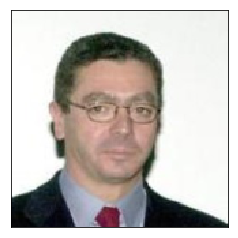

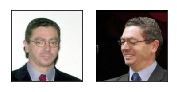

In [18]:
testing_data = copy.deepcopy(data)
testing_emb = copy.deepcopy(emb_dict)

# take random guy to test
guy = np.random.choice(list(testing_data.keys()))

# take random pic of the guy and remove taken pic from the data to avoid cheating
p_ind = np.random.randint(len(testing_data[guy]))
curr_pic = testing_data[guy].pop(p_ind)
curr_emb = emb_dict[guy].pop(p_ind)
print(curr_emb.shape)


#compute mean distance from random pic of the chosen guy to all the guys in the database
min_dist = sys.maxsize

mean_dist = []
for g in testing_data.keys():
    mean_embedding = np.mean(emb_dict[g], axis=0)
    
    # compute dist from guy's pic to mean embedding
    dist = np.linalg.norm(mean_embedding - curr_emb)
    mean_dist.append(dist)
    if min_dist > dist:
        min_dist = dist
        closest_guy = g
    print('%s\t: %.2f' % (g,dist))

fig1 = plt.figure()
print('We sample the pic from %s.' % guy)
print('---------------------------')
print("I think, the pic belongs to %s." % closest_guy)

utils.imshow(fig1, curr_pic)
fig2 = plt.figure()
fig2.set_figheight(15)
fig2.set_figwidth(15)
# show no more than 10 pics of the guy
n_p = max(len(data[closest_guy]), 10) 
for i, pic in enumerate(data[closest_guy]):
    if i > n_p:
        break
    utils.imshow(fig2, pic, 1, n_p, i+1)

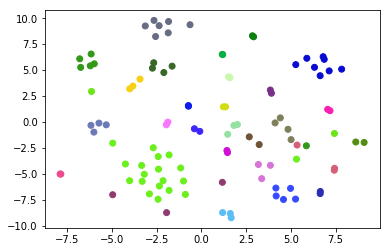

In [9]:
from sklearn.manifold import TSNE
arr = []
cols = []

for guy in emb_dict:
    color = utils.get_random_color()
    for p in emb_dict[guy]:
        arr.append(p)
        cols.append(color)        

model = TSNE(n_components=2, random_state=0, init='pca')
np.set_printoptions(suppress=True)
tsne_res = model.fit_transform(arr) 
plt.scatter(tsne_res[:,0], tsne_res[:,1], color=cols);